# Carnevale, Cattoni MiniChallenge

We chosed the Hotel dataset

In [76]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

In [77]:
with open("hotels.pk", "rb") as f:
    df = pickle.load(f)

# 1. EXPLORATORY ANALYSIS

In [78]:
df.shape

(23254, 4)

In [79]:
df.head()

,Location,Revenue,Demand,Occupancy
Date,,,,
2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


In [80]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=23254, freq=None)

In [81]:
df = df.reset_index()
df.head()

,Date,Location,Revenue,Demand,Occupancy
0,2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
1,2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2,2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
3,2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
4,2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23254 entries, 0 to 23253
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23254 non-null  datetime64[ns]
 1   Location   23254 non-null  object        
 2   Revenue    23254 non-null  float64       
 3   Demand     23254 non-null  float64       
 4   Occupancy  23254 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 908.5+ KB


In [83]:
df.columns

Index(['Date', 'Location', 'Revenue', 'Demand', 'Occupancy'], dtype='object')

In [84]:
df["Location"].value_counts()

Location
Atlanta       3227
NewYork       2861
Orlando       2861
Chicago       2861
LosAngeles    2861
Washington    2861
Dallas        2861
Boston        2861
Name: count, dtype: int64

We chose Los Angeles city

In [85]:
df = df[df["Location"] == "LosAngeles"]
df["Location"].value_counts()

Location
LosAngeles    2861
Name: count, dtype: int64

In [86]:
assert (len(df["Location"].unique()) == 1 )
df = df.drop("Location", axis=1)
df.shape

(2861, 4)

In [87]:
assert (df["Date"].dt.year.min() == 2013)
assert (df["Date"].dt.year.max() == 2020)

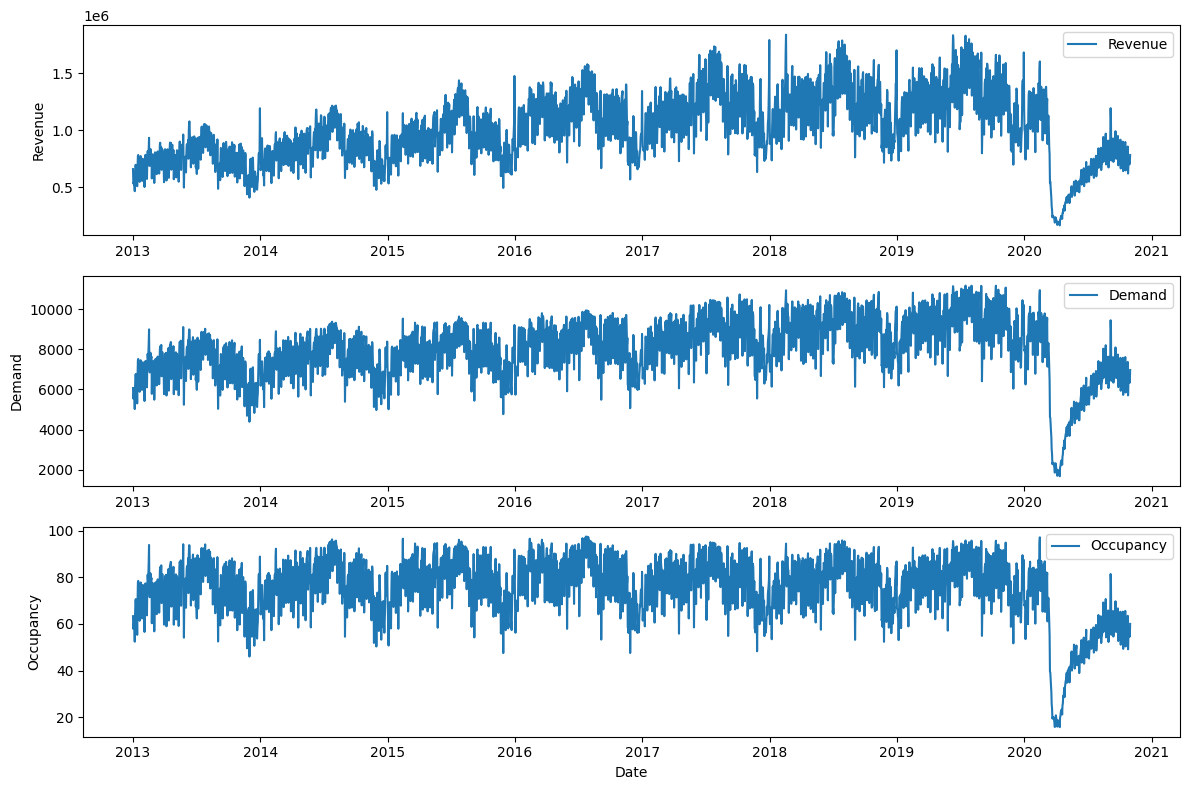

In [88]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(df["Date"], df["Revenue"], label="Revenue")
axes[0].set_ylabel("Revenue")
axes[0].legend()

axes[1].plot(df["Date"], df["Demand"], label="Demand")
axes[1].set_ylabel("Demand")
axes[1].legend()

axes[2].plot(df["Date"], df["Occupancy"], label="Occupancy")
axes[2].set_ylabel("Occupancy")
axes[2].set_xlabel("Date")
axes[2].legend()

plt.tight_layout()

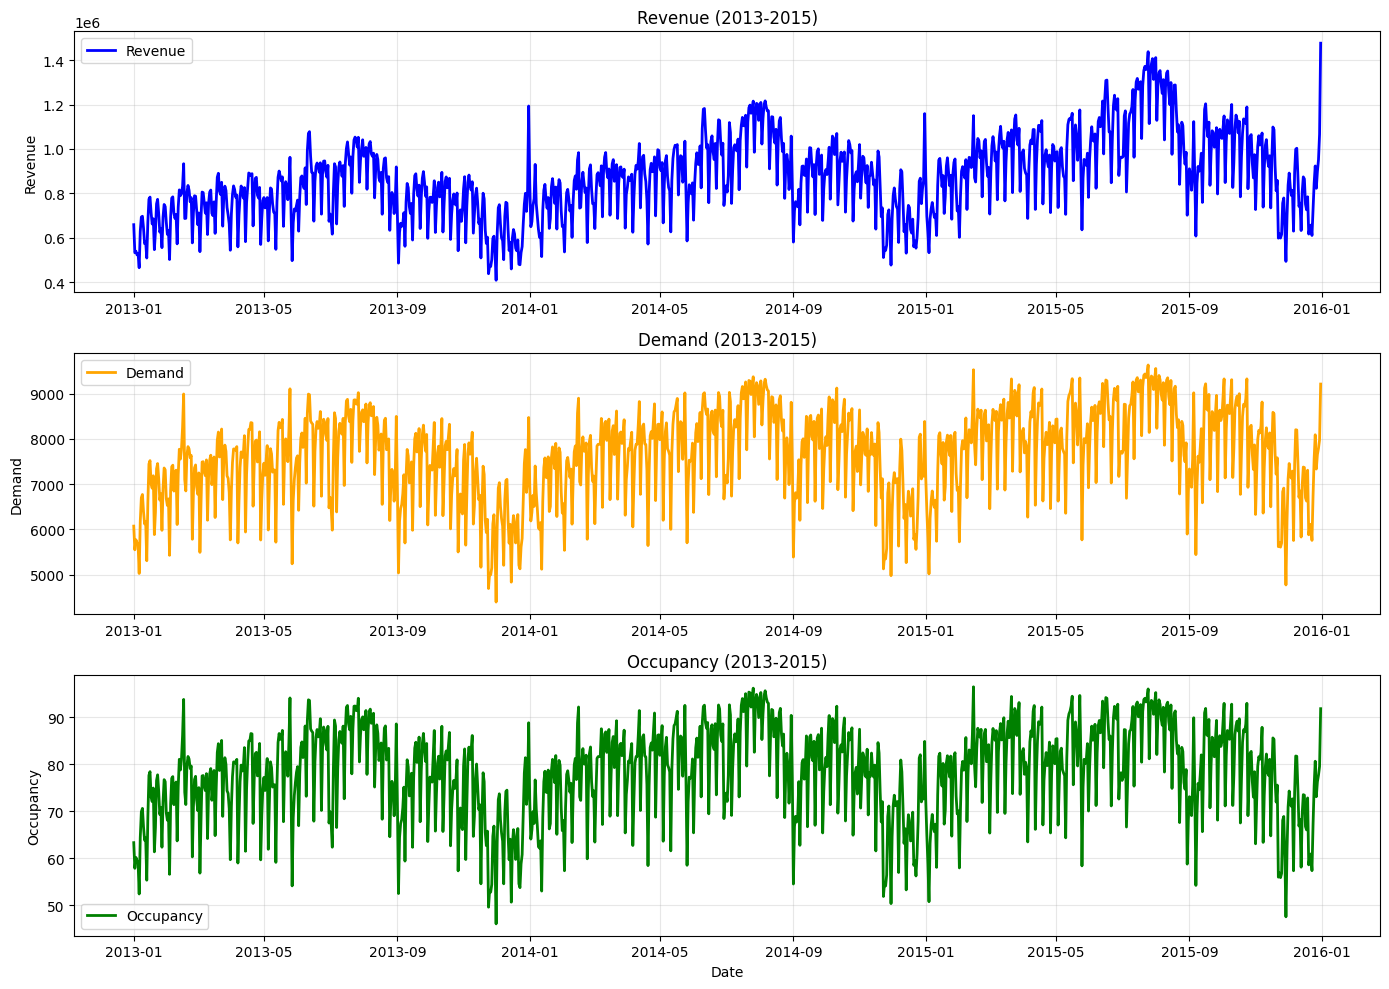

In [89]:
mask = (df["Date"] >= "2013-01-01") & (df["Date"] <= "2015-12-31")
df_filtered = df[mask]

columns = ["Revenue", "Demand", "Occupancy"]
colors = ["blue", "orange", "green"]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for idx, (col, color) in enumerate(zip(columns, colors)):
    axes[idx].plot(df_filtered["Date"], df_filtered[col], linewidth=2, label=col, color=color)
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} (2013-2015)")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()


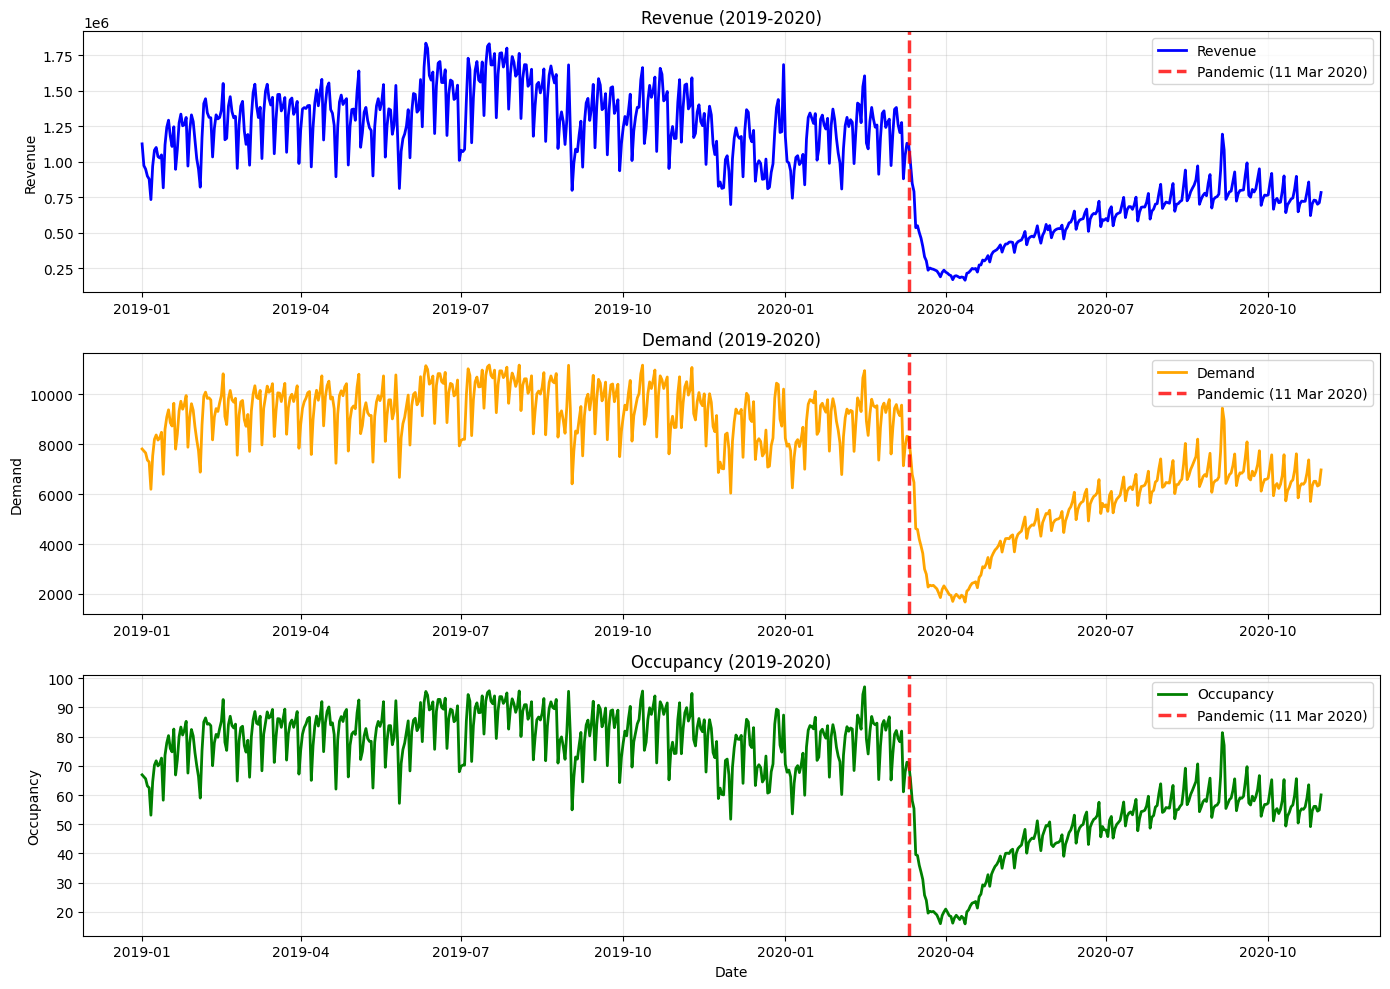

In [90]:
mask = (df["Date"] >= "2019-01-01") & (df["Date"] <= "2020-12-31")
df_filtered = df[mask]

columns = ["Revenue", "Demand", "Occupancy"]
colors = ["blue", "orange", "green"]

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# date of when the world entered into the "Pandemia"
pandemic_date = pd.Timestamp("2020-03-11")

for idx, (col, color) in enumerate(zip(columns, colors)):
    axes[idx].plot(df_filtered["Date"], df_filtered[col], linewidth=2, label=col, color=color)
    
    axes[idx].axvline(pandemic_date, color='red', linestyle='--', linewidth=2.5, label='Pandemic (11 Mar 2020)', alpha=0.8)
    
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f"{col} (2019-2020)")
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()


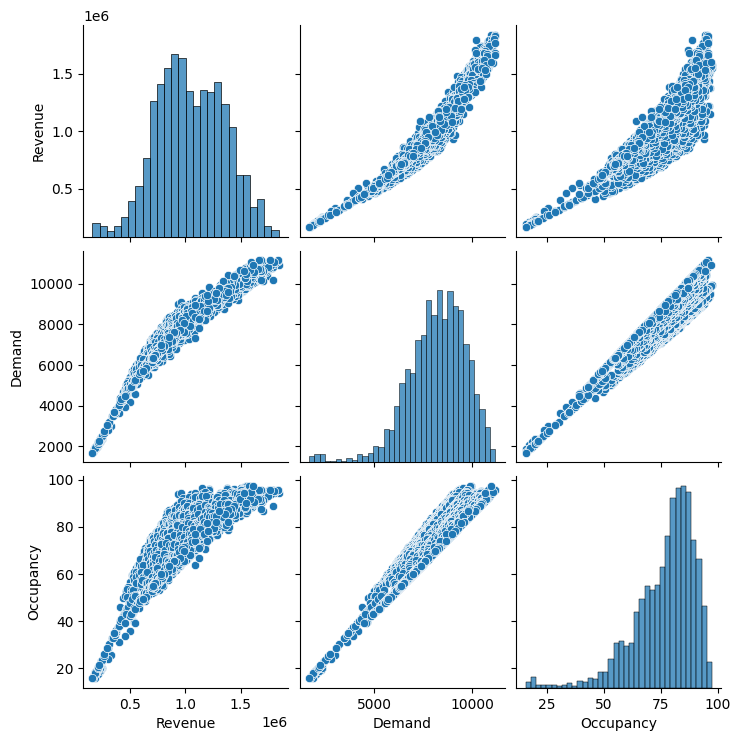

In [91]:
sns.pairplot(df)

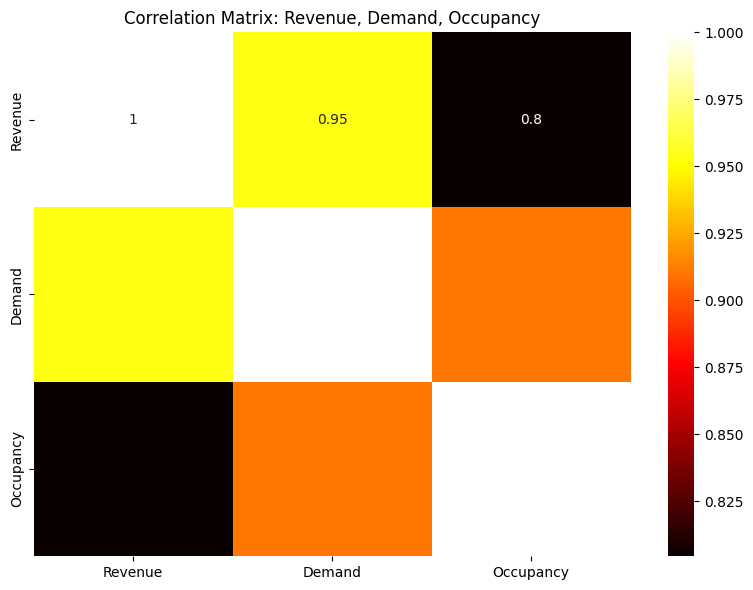

In [92]:
correlation_matrix = df[["Revenue", "Demand", "Occupancy"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = "hot")
plt.title("Correlation Matrix: Revenue, Demand, Occupancy")
plt.tight_layout()
plt.show()

ACF

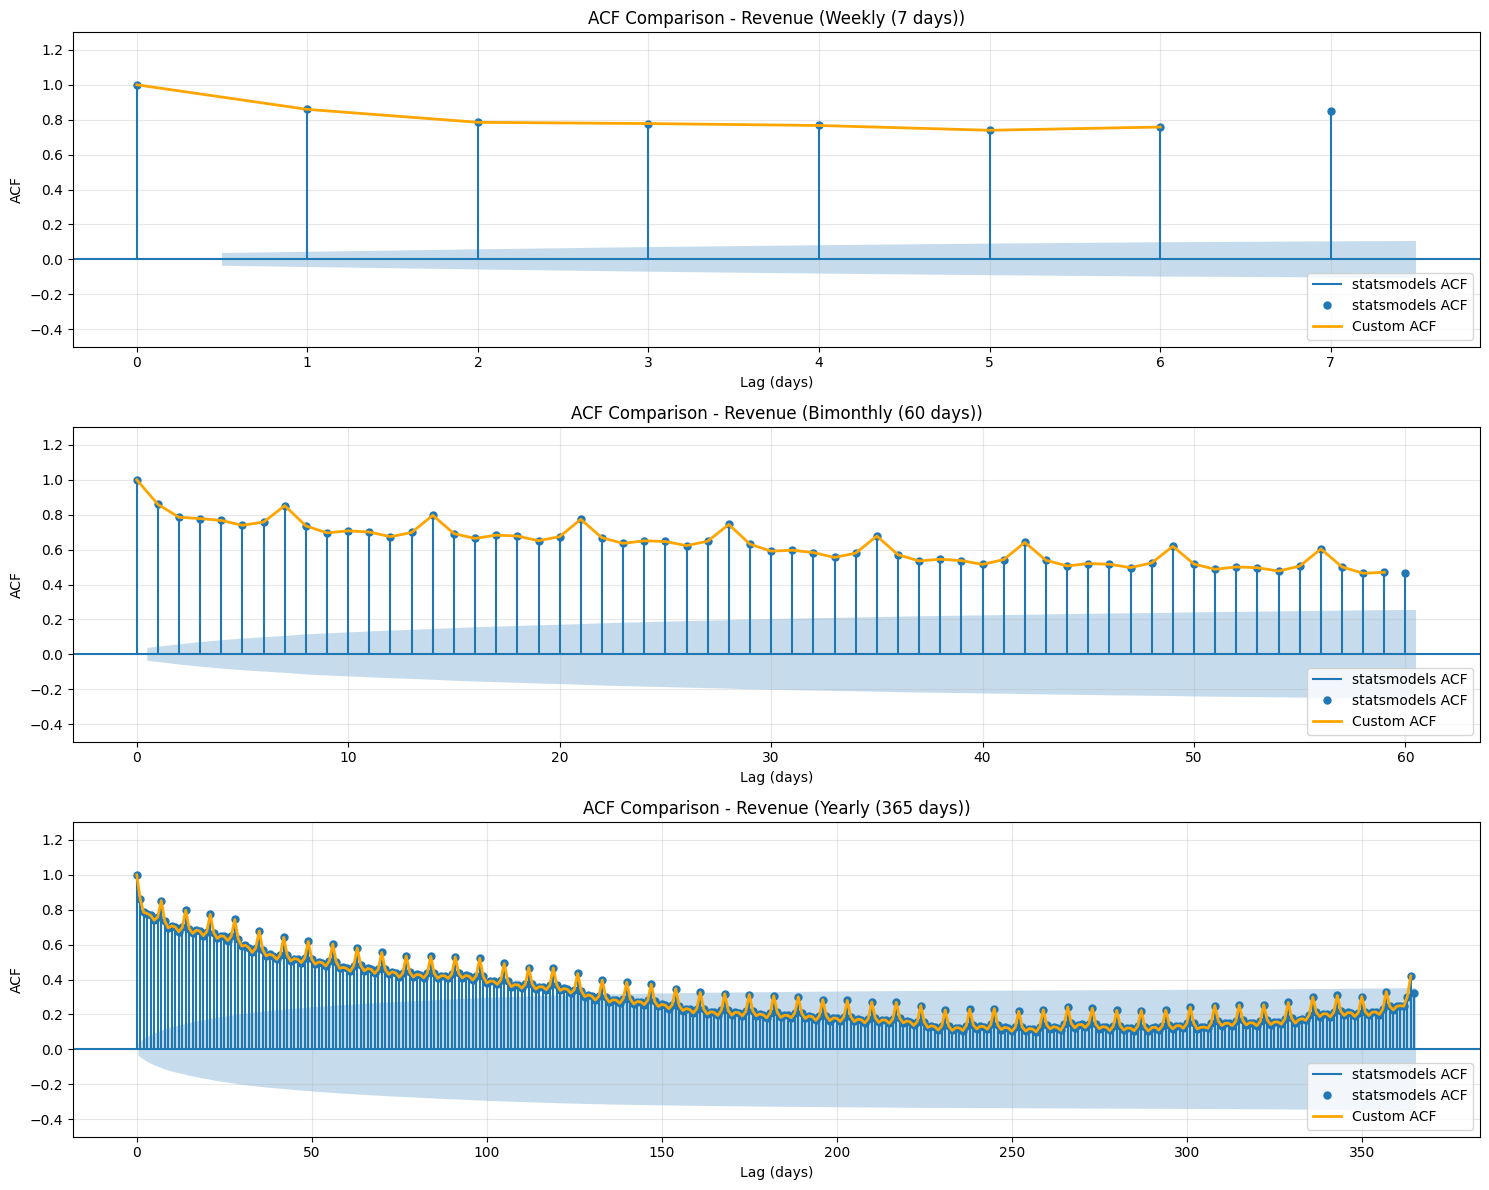

In [93]:
lags_list = [7, 60, 365]
titles = ["Weekly (7 days)", "Bimonthly (60 days)", "Yearly (365 days)"]

acf = lambda x, k: ((x.shift(k) - x.mean()) * (x - x.mean())).sum() / x.std()**2 / len(x)

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

for ax, lags, title in zip(axes, lags_list, titles):
    plot_acf(df['Revenue'], lags=lags, ax=ax, label='statsmodels ACF')
    plt.sca(ax)
    plt.plot([acf(df['Revenue'], k) for k in range(lags)], label='Custom ACF', color='orange', linewidth=2)
    
    ax.set_title(f'ACF Comparison - Revenue ({title})')
    ax.set_xlabel('Lag (days)')
    ax.set_ylabel('ACF')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-0.5, 1.3)
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

## Stationarity and Transformations

In [94]:
from statsmodels.tsa.stattools import adfuller, kpss

stationarity_tests = {}

vars_to_check = ['Revenue', 'Demand', 'Occupancy']

for var in vars_to_check:
    adf_test = adfuller(df[var])
    kpss_test = kpss(df[var], nlags='auto')
    stationarity_tests[var] = pd.Series({'adf pval': adf_test[1], 'kpss pval': kpss_test[1]})

pd.concat(stationarity_tests).unstack().sort_values('adf pval')


/var/folders/0l/91zty_zs7bj5b_1bwsr3q2y40000gn/T/ipykernel_40892/2646951362.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df[var], nlags='auto')
/var/folders/0l/91zty_zs7bj5b_1bwsr3q2y40000gn/T/ipykernel_40892/2646951362.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df[var], nlags='auto')
/var/folders/0l/91zty_zs7bj5b_1bwsr3q2y40000gn/T/ipykernel_40892/2646951362.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df[var], nlags='auto')


,adf pval,kpss pval
Occupancy,0.002292,0.01
Demand,0.002927,0.01
Revenue,0.013750,0.01


These values suggest non-stationarity in this data, we procceed by taking differences of consecutive values to eliminate trends

In [95]:
df['Revenue'] = df['Revenue'].diff()
df['Demand'] = df['Demand'].diff()
df['Occupancy'] = df['Occupancy'].diff()

df = df.dropna(subset=['Revenue', 'Demand', 'Occupancy'])    # Dropping NaNs because of the differencing

stationarity_tests = {}

for var in vars_to_check:
    adf_test = adfuller(df[var]) 
    kpss_test = kpss(df[var], nlags='auto')        
    stationarity_tests[var] = pd.Series({'adf pval': adf_test[1], 'kpss pval': kpss_test[1]})

pd.concat(stationarity_tests).unstack().sort_values('adf pval')


/var/folders/0l/91zty_zs7bj5b_1bwsr3q2y40000gn/T/ipykernel_40892/3591795655.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df[var], nlags='auto')
/var/folders/0l/91zty_zs7bj5b_1bwsr3q2y40000gn/T/ipykernel_40892/3591795655.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df[var], nlags='auto')
/var/folders/0l/91zty_zs7bj5b_1bwsr3q2y40000gn/T/ipykernel_40892/3591795655.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df[var], nlags='auto')


,adf pval,kpss pval
Revenue,7.679742e-21,0.1
Occupancy,1.194719e-20,0.1
Demand,2.243237e-20,0.1


Now these results suggest stationarity